In [1]:
import numpy as np
import scipy.integrate as SI
import matplotlib.pyplot as plt
import warnings
from sympy import *
from scipy.integrate import odeint
warnings.filterwarnings('ignore')    #suppress warnings
from scipy.optimize import curve_fit
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (18,8)

# $$ \text{ASSIGNMENT 1} $$

### $$\textbf{Solving ODE using Euler method} , 4^{th} \textbf{order Runge Kutta method} , \textbf{scipy.integrate.odeint()} $$

Q1.  Solve the functions: $ \large\displaystyle\frac{\text{d}x}{\text{dt}}=\sin x $

 Implement : $\displaystyle{\qquad a) \ \textbf{Euler’s method }  \quad
              b) {\ } 4^{th} \textbf{order Runge Kutta  Method }}$ 
 
 Given condition for : $ \displaystyle\large{ x_0 = [ 0.1,1.55,4{}]},$ Superpose these three curves.

In [2]:
def euler(f,j,n):
    t,X,T = 0,[j],[0]
    for i in range(0,int(n)+1):
        j = j + h * f(j,t)
        t = t + h
        X.append(j)
        T.append(t)
    return T ,X  

def runge_kutta4(f,j,n):
    t,X,T = 0,[j],[0]
    for i in range(0,int(n)+1):
        k1 = f(j,t)
        k2 = f(j + (h/2)*k1 , t + (h/2))
        k3 = f(j + (h/2)*k2 , t + (h/2))
        k4 = f(j + h*k3 , t + h)
        j = j + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        t = t + h
        X.append(j)
        T.append(t)
    return T, X

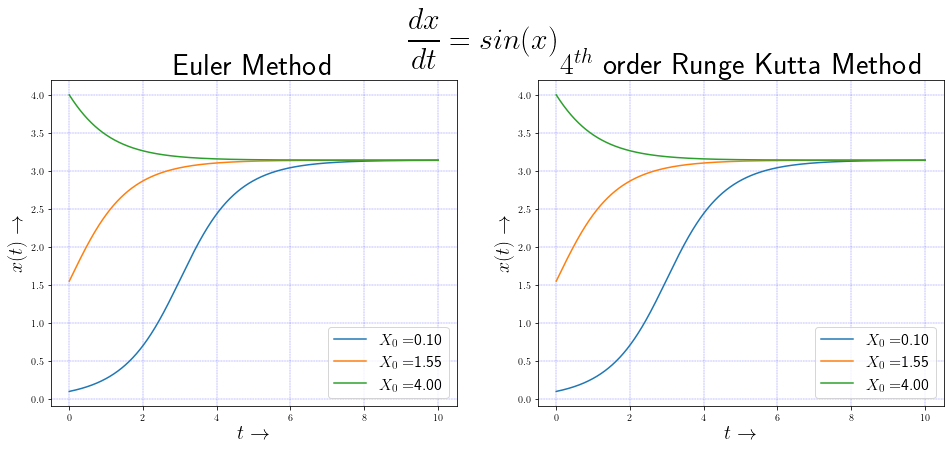

In [3]:
def f(x,t):
    return np.sin(x)
                                 
x0 = [0.1,1.55,4]    
h,t0,tmax = 0.01,0.,10.   # 𝑡_0 → start time,𝑡_𝑚𝑎𝑥 → max time period,ℎ → step size            
n = (tmax-t0)/h           # 𝑛 → no. of steps

plt.rcParams['text.usetex'] = True
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
for j in x0:
    ax1.plot(euler(f,j,n)[0],euler(f,j,n)[1],label='$X_0 =$%.2f'%j)
    ax1.set_xlabel(r'$t \rightarrow$',size='20')
    ax1.set_ylabel(r'$x(t) \rightarrow$',size=20)
    ax1.grid(color='b', ls = '-.', lw = 0.25)
    ax1.set_title('Euler Method',size=30)
    ax1.legend(fontsize=16,loc='lower right')
    ax2.plot(runge_kutta4(f,j,n)[0],runge_kutta4(f,j,n)[1],label='$X_0 =$%.2f'%j)
    ax2.set_xlabel(r'$t \rightarrow$',size='20')
    ax2.set_ylabel(r'$x(t) \rightarrow$',size=20)
    ax2.grid(color='b', ls = '-.', lw = 0.25)
    ax2.set_title('$4^{th}$ order Runge Kutta Method',size=30)
    ax2.legend(fontsize=16,loc='lower right')
plt.suptitle(r"$\displaystyle\frac{dx}{dt}=sin(x)$",size=30,y=1.05)
plt.show()

Q2. Solve the eqn  : $ \large \frac{\text{d}x}{\text{dt}} = -xt^2 $

Implement a) using $\textbf{Euler method}\quad$ b) $ \ 4^{th} \textbf{order Runge-Kutta method}$

Use this fact to calculate : $  \text{ E(t)}=|x_{\text{numerical}} (t)-x(t)| $

$  \displaystyle{\therefore E=h^m => \ln E=m \ln h => Y=m*X+C }  $

$ \text{where } Y= \ln E , \text{and } X= \ln h , \text{and } C=\text{const.}  $

For different values of $h$. Find the power of $h$ with which $\text{E(t)}$ is proportional.



$x_0\rightarrow \text{  initial conditions of dependent variable}  $

$ n\rightarrow \text{ no. of steps}  $

$ t_0\rightarrow \text{ given initial condition}  $

$ t_{max}\rightarrow \text{ Given max value of independent variable}  $

$ h\rightarrow \text{ step size} = \frac{(t_{max}-t_0)}{n} $

$ x_{analytical}\rightarrow |\text{analytical value of the solution }|_{t} $

In [4]:
def Euler(f,N,h,x,t):
    E2 = []
    for i in range(len(N)):
        t,x = t0,x0
        for j in range(N[i]):
            x = x + h[i] * f(x,t)
            t = t + h[i]
        E2.append(abs(x_analytical-x))
    return E2

def Runge_Kutta4(f,N,h,x,t):
    E2 = []
    for i in range(len(N)):
        t,x = t0,x0
        for j in range(N[i]):
            k1 = f(x,t)
            k2 = f(x + (h[i]/2) * k1 , t + (h[i]/2))
            k3 = f(x + (h[i]/2) * k2 , t + (h[i]/2))
            k4 = f(x + h[i] * k3 , t + h[i])
            x = x + (h[i]/6) * (k1 + 2*k2 + 2*k3 + k4)
            t = t + h[i]
        E2.append(abs(x_analytical-x))
    return E2

In [5]:
t=symbols('t',real=True)
x=Function('x')(t)
dxdt=x.diff(t)
eq1=Eq(dxdt,-x*t**2)
print('Given choice is  :')
display(eq1)
s11=dsolve(eq1)
print('general soln. :')
display(s11)
s12=dsolve(eq1, ics={x.subs(t,0):10})
print('particular soln. :')
display(s12)
s12.evalf(subs={t: 2})

Given choice is  :


Eq(Derivative(x(t), t), -t**2*x(t))

general soln. :


Eq(x(t), C1*exp(-t**3/3))

particular soln. :


Eq(x(t), 10*exp(-t**3/3))

Eq(x(2), 0.694834512228015)

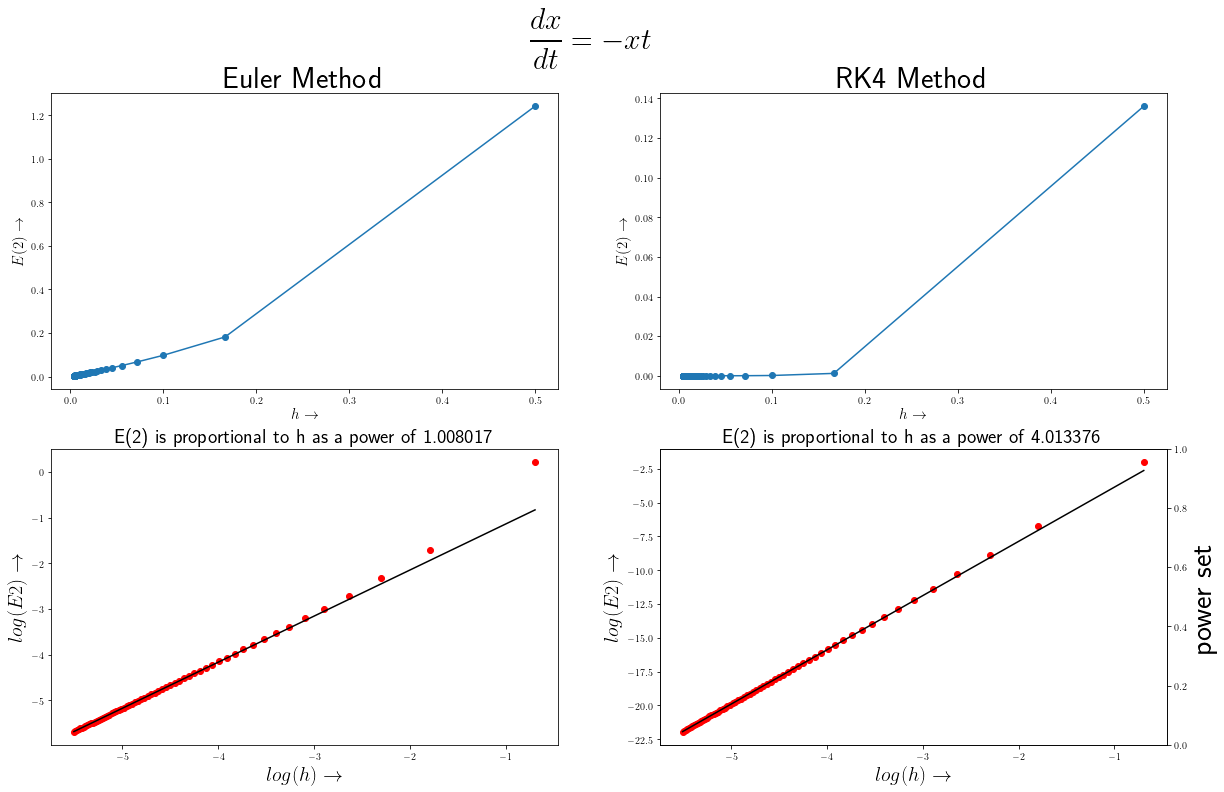

In [6]:
def f(x,t):
    return -x*t**2

n = np.arange(4,500,8)
x0,t0,tmax = 10, 0, 2                   
h = (tmax-t0)/n     
x_analytical = 0.694834512228015 

E2e = Euler(f,n,h,x0,t0)
E2r = Runge_Kutta4(f,n,h,x0,t0) 

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20,12))  
ax1.plot(h,E2e,'o-')
ax1.set_xlabel(r"$h \rightarrow$",size=15)
ax1.set_ylabel(r"$E(2) \rightarrow$",size=15)
ax1.set_title('Euler Method',size=30)
ax2.plot(h,E2r,'o-')
ax2.set_xlabel(r"$h \rightarrow$",size=15)
ax2.set_ylabel(r"$E(2) \rightarrow$",size=15)
ax2.set_title('RK4 Method',size=30)
E2e,E2r,H = np.log(E2e),np.log(E2r),np.log(h)

def ff(H,m,c):
    return m*H+c

pe,se=curve_fit(ff,H[-30:],E2e[-30:])
pr,sr=curve_fit(ff,H[-30:],E2r[-30:])

ax3.plot(H,E2e,'ro',H,ff(H,*pe),"k")
ax3.set_title('E(2) is proportional to h as a power of  %.6f'%pe[0],size=20)
ax3.set_xlabel(r'$log(h) \rightarrow$',size=20)
ax3.set_ylabel(r'$log(E2) \rightarrow$',size=20)
ax4.plot(H,E2r,'ro',H,ff(H,*pr),"k")
ax4.set_title('E(2) is proportional to h as a power of  %.6f'%pr[0],size=20)
ax4.set_xlabel(r'$log(h) \rightarrow$',size=20)
ax4.set_ylabel(r'$log(E2) \rightarrow$',size=20)
ax4=plt.twinx()
plt.ylabel('power set',fontsize=30)
plt.suptitle(r"$\displaystyle\frac{dx}{dt}=-xt$",y=0.98,size=30)
plt.show()

Q3. Repeat 2 with another function of your choice function of your choice:  

In [7]:
t=symbols('t',real=True)
x=Function('x')(t)
dxdt=x.diff(t)
eq1=Eq(dxdt,-x*t)
print('My choice is  :')
display(eq1)
s11=dsolve(eq1)
print('general soln. :')
display(s11)
s12=dsolve(eq1, ics={x.subs(t,0):10})
print('particular soln. :')
display(s12)
s12.evalf(subs={t: 2})

My choice is  :


Eq(Derivative(x(t), t), -t*x(t))

general soln. :


Eq(x(t), C1*exp(-t**2/2))

particular soln. :


Eq(x(t), 10*exp(-t**2/2))

Eq(x(2), 1.35335283236613)

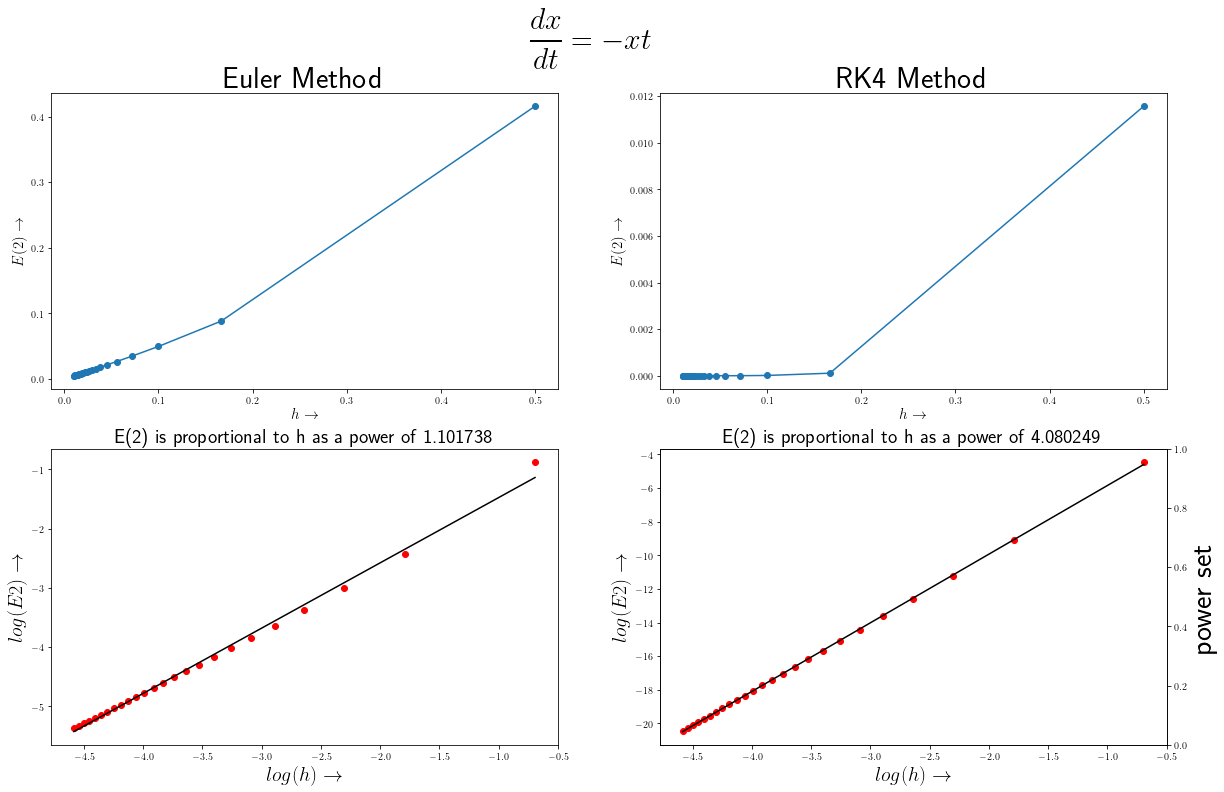

In [8]:
def f(x,t):
    return -x*t

n=np.arange(4,200,8)
x0,t0,tmax = 10, 0, 2                   
h = (tmax-t0)/n
x_analytical = 1.35335283236613 

E2e = Euler(f,n,h,x0,t0)
E2r = Runge_Kutta4(f,n,h,x0,t0) 

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20,12))  
ax1.plot(h,E2e,'o-')
ax1.set_xlabel(r"$h \rightarrow$",size=15)
ax1.set_ylabel(r"$E(2) \rightarrow$",size=15)
ax1.set_title('Euler Method',size=30)
ax2.plot(h,E2r,'o-')
ax2.set_xlabel(r"$h \rightarrow$",size=15)
ax2.set_ylabel(r"$E(2) \rightarrow$",size=15)
ax2.set_title('RK4 Method',size=30)
E2e,E2r,H = np.log(E2e),np.log(E2r),np.log(h)

def ff(H,m,c):
    return m*H+c

pe,se=curve_fit(ff,H[-30:],E2e[-30:])
pr,sr=curve_fit(ff,H[-30:],E2r[-30:])

ax3.plot(H,E2e,'ro',H,ff(H,*pe),"k")
ax3.set_title('E(2) is proportional to h as a power of  %.6f'%pe[0],size=20)
ax3.set_xlabel(r'$log(h) \rightarrow$',size=20)
ax3.set_ylabel(r'$log(E2) \rightarrow$',size=20)
ax4.plot(H,E2r,'ro',H,ff(H,*pr),"k")
ax4.set_title('E(2) is proportional to h as a power of  %.6f'%pr[0],size=20)
ax4.set_xlabel(r'$log(h) \rightarrow$',size=20)
ax4.set_ylabel(r'$log(E2) \rightarrow$',size=20)
ax4=plt.twinx()
plt.ylabel('power set',fontsize=30)
plt.suptitle(r"$\displaystyle\frac{dx}{dt}=-xt$",y=0.98,size=30)
plt.show()

Q4.Solve : $ \large \frac{\text{d}x}{\text{dt}}=x(1-x),\qquad$using **scipy.integrate.odeint()**

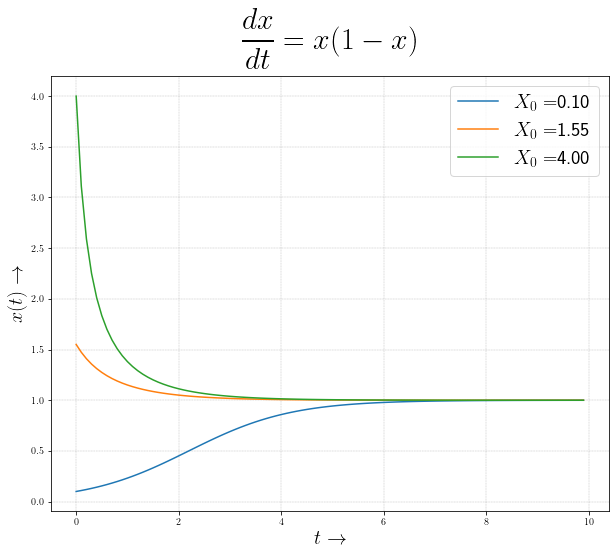

In [9]:
def f(x,t):
    return x*(1-x)

t = np.arange(0,10,0.1)
x0 = [0.1,1.55,4]   
plt.figure(figsize=(10,8))
for j in x0:
    x = SI.odeint(f,j,t)
    plt.plot(t,x,label = '$X_0 =$%.2f'%j)
plt.xlabel(r'$t \rightarrow$',size='20')
plt.ylabel(r'$x(t) \rightarrow$',size=20)
plt.title(r"$\displaystyle\frac{dx}{dt}=x(1-x)$",size=30,y=1.051)
plt.legend(fontsize = 20,loc='upper right')
plt.grid(color = 'grey', ls = '-.', lw = 0.25)
plt.show()

# $$ \text{ASSIGNMENT 2} $$

$\displaystyle{ \text{ Implement }: }$
$\displaystyle{a) \ \text{Euler method} \quad}$
$\displaystyle{b) \ 4^{th} \text{order Runge Kutta method} \quad }$
$\displaystyle{c) \ \text{scipy.integrate.odeint()}}$

In [2]:
def Euler(f,x,T,n,h):
    X,U = [],[]
    for i in  range (int(n) + 1):
        x = x + h*f(x,T)
        X.append(x[0])
        U.append(x[1])
    return X,U    

def RK4_method(f,x,T,n,h):
    X,U = [],[]
    for i in  range (int(n) + 1):
        k1 = f(x,i)
        k2 = f(x + (h/2)*k1 , i + (h/2))
        k3 = f(x + (h/2)*k2 , i + (h/2))
        k4 = f(x + h*k3 , i + h)
        x = x + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        X.append(x[0])
        U.append(x[1])
    return X,U

def SIO_method(f,x,T):
    s = SI.odeint(f,x,T)
    X,U = s[:,0], s[:,1]
    return X,U

$\displaystyle{Q1.\text{ Solve the motion of a particle thrown vertically upward with a velocity} :}$
$$\displaystyle{ m \frac{\text{d}^{2}x}{\text{dt}^{2}}=-mg }$$

$$\displaystyle{=>\frac{\text{d}^{2}x}{\text{dt}^{2}}=-g }$$

$\displaystyle{\text{Take }x_{0}=0,u=10m/s, g=9.8 m/s^{2}, m = 1 } $

$\displaystyle{\text{Compare this with theoritical curve }: x=ut-\frac{1}{2}gt^{2}}$

In [3]:
def f(X,t):
    x = X[0]
    u = X[1]
    dx = u
    du = -g
    return np.array([dx,du])

x0 = 0                        # initial conditions of position variable 
u0 = 10                       # initial conditions of velocity variable 
n  = 10                       # no. of steps
g  = 9.8                      # accleration due to gravity
h  = 0.0001                   # step size
t  = 0                        # initial start time
tmax =  2*u0/g                # final end time
T = np.arange(t,tmax+h,h)     # time space
n = len(T)-1                  # no. of steps
x = np.array([x0,u0])         # initial conditions of dependent variable

X_analytic = u0*T-(g*T*T)/2
V_analytic = u0-(g*T)

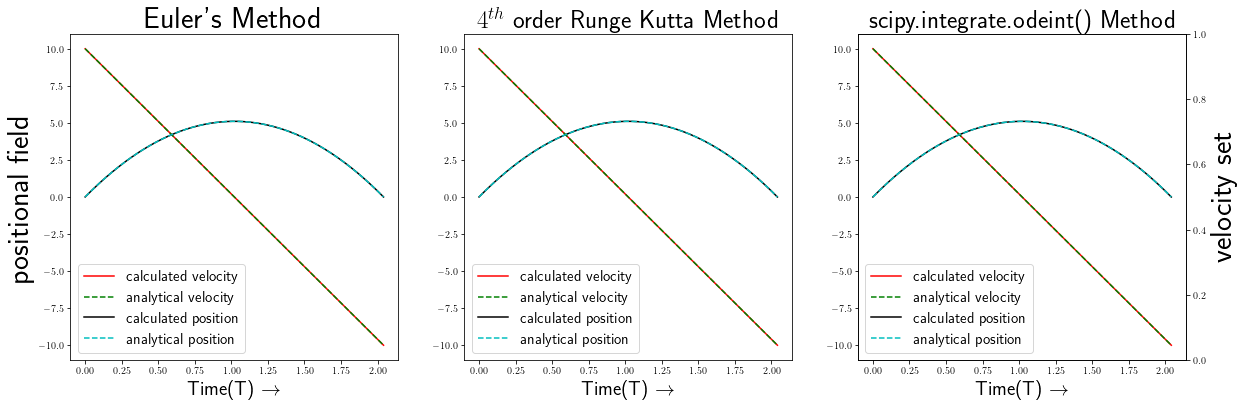

In [4]:
plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(131)
plt.plot(T,Euler(f,x,T,n,h)[1],'r',T,V_analytic,'g--', T,Euler(f,x,T,n,h)[0],'k',T,X_analytic,'c--')
plt.xlabel(r"Time(T) $\rightarrow$",size=20)
plt.ylabel("positional field", fontsize=30)
plt.legend(['calculated velocity','analytical velocity','calculated position','analytical position'],fontsize=15)
plt.title(" Euler's Method ",fontsize=30)
plt.subplot(132)
plt.plot(T,RK4_method(f,x,T,n,h)[1],'r',T,V_analytic,'g--', T,RK4_method(f,x,T,n,h)[0],'k',T,X_analytic,'c--')
plt.xlabel(r"Time(T) $\rightarrow$",size=20)
plt.legend(['calculated velocity','analytical velocity','calculated position','analytical position'],fontsize=15)
plt.title('$4^{th}$ order Runge Kutta Method',fontsize=25)
plt.subplot(133)
plt.plot(T,SIO_method(f,x,T)[1],'r',T,V_analytic,'g--', T,SIO_method(f,x,T)[0],'k',T,X_analytic,'c--')
plt.xlabel(r"Time(T) $\rightarrow$",size=20)
plt.legend(['calculated velocity','analytical velocity','calculated position','analytical position'],fontsize=15)
plt.title('scipy.integrate.odeint() Method ',fontsize=25)
plt.twinx()
plt.ylabel('velocity set',fontsize=30)
plt.show()

$ \displaystyle{Q2.\text{Solve the motion of a} \textbf{ simple harmonic oscillator} \text{ for } :}$

$$\displaystyle{ m\frac{\text{d}^2 x}{\text{dt}^2}=-m\omega^2 x} $$

$$\displaystyle{=>\frac{\text{d}^2 x}{\text{dt}^2}=-\omega^2 x}$$

$\displaystyle{\quad\text{Taking }m=1,\omega=1,x_0=1,v_0=0,g=9.8 m/s^2 }$

$\displaystyle{ \text{Compare this with theoretical curve }: x=\cos \omega t \\ \text{ And also plot the phase plot (v-x) for } t_{max}=40\frac{\pi}{\omega} }$

In [5]:
def f(X,t):
    x = X[0]
    v = X[1]
    dx = v
    dv = -w**2*x
    return np.array([dx,dv])

x0 = 1         # initial conditions of position variable 
v0 = 0         # initial conditions of velocity variable 
w = 1          # natural angular frequency
h = 0.0001     # step size
g = 9.8        # accleration due to gravity
t = 0                  # initial start time
tmax = (40*np.pi)/w    # final end time
T = np.arange(t,tmax+h,h)  # time space
n = len(T)-1               # no. of steps
x = np.array([x0,v0])

X_analytic = np.cos(w*T)
V_analytic = np.sin(w*T)*(-w)

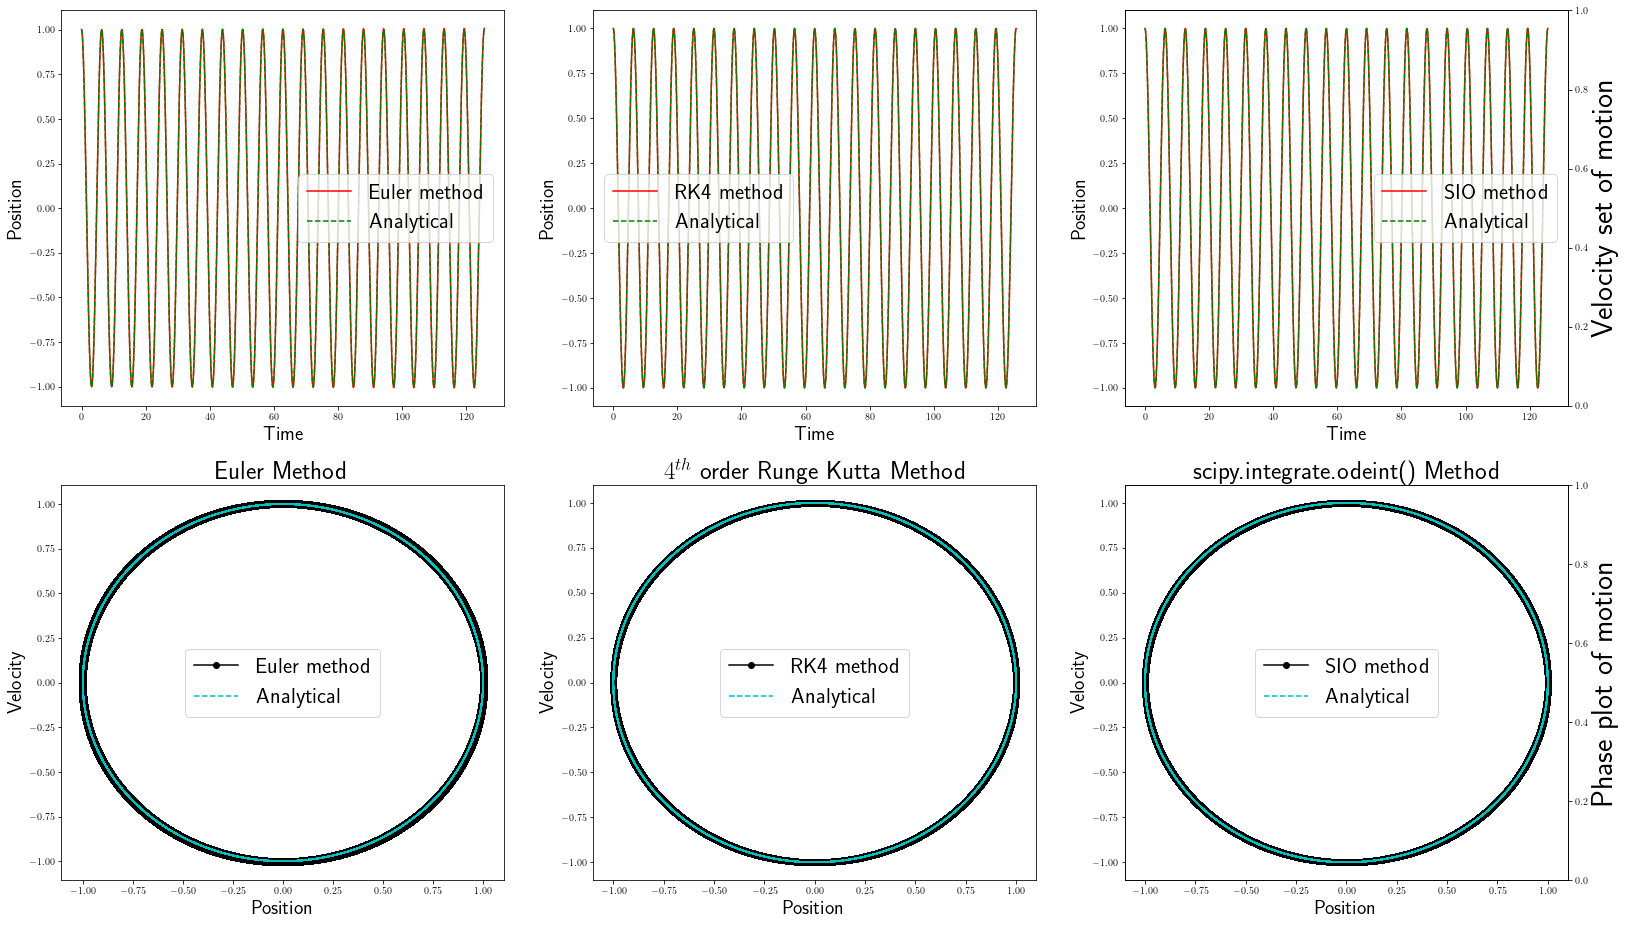

In [6]:
plt.rcParams["figure.figsize"] = (27,16)

plt.subplot(231)
plt.plot(T,Euler(f,x,T,n,h)[0],'r', T,X_analytic,'g--')
plt.xlabel('Time',size=20)
plt.ylabel("Position",size=20)
plt.legend(["Euler method","Analytical"],fontsize=22)

plt.subplot(232)
plt.plot(T,RK4_method(f,x,T,n,h)[0],'r', T,X_analytic,'g--')
plt.xlabel('Time',size=20)
plt.ylabel("Position",size=20)
plt.legend(["RK4 method","Analytical"],fontsize=22)

plt.subplot(233)
plt.plot(T,SIO_method(f,x,T)[0],'r', T,X_analytic,'g--')
plt.xlabel('Time',size=20)
plt.ylabel("Position",size=20)
plt.legend(["SIO method","Analytical"],fontsize=22)
plt.twinx()
plt.ylabel('Velocity set of motion',fontsize=30)

plt.subplot(234)
plt.plot(Euler(f,x,T,n,h)[0], Euler(f,x,T,n,h)[1],'ko-', X_analytic,V_analytic,'c--')
plt.title('Euler Method',fontsize=25)
plt.xlabel('Position',size=20)
plt.ylabel("Velocity",size=20)
plt.legend(["Euler method","Analytical"],fontsize=22)

plt.subplot(235)
plt.plot(RK4_method(f,x,T,n,h)[0], RK4_method(f,x,T,n,h)[1],'ko-', X_analytic,V_analytic,'c--')
plt.title('$4^{th}$ order Runge Kutta Method',fontsize=25)
plt.xlabel('Position',size=20)
plt.ylabel("Velocity",size=20)
plt.legend(["RK4 method","Analytical"],fontsize=22)

plt.subplot(236)
plt.plot(SIO_method(f,x,T)[0], SIO_method(f,x,T)[1],'ko-', X_analytic,V_analytic,'c--')
plt.title('scipy.integrate.odeint() Method',fontsize=25)
plt.xlabel('Position',size=20)
plt.ylabel("Velocity",size=20)
plt.legend(["SIO method","Analytical"],fontsize=22)
plt.twinx()
plt.ylabel('Phase plot of motion',fontsize=30)

plt.show()

Q3. Solve **Harmonic Oscillator** with velocity proportional damping $2bv$, $m=1 :$
$$ \displaystyle{\large m\frac{\text{d}^{2}x}{\text{dt}^{2}}=-m\omega^{2}x-2mb\frac{\text{d}x}{\text{dt}}} $$

$$\displaystyle{=>\large \frac{\text{d}^{2}x}{\text{dt}^{2}}=-\omega^{2}x-2b\frac{\text{d}x}{\text{dt}}}$$

Plot $(x-t)$ curve as well as $(v-x)$ curve for $\displaystyle{b<\omega,b=\omega,b>\omega }$

In [7]:
def f(X,t):
    x = X[0]
    v = X[1]
    dxdt = v
    dvdt = -w**2*x - 2*b*v
    return np.array([dxdt,dvdt])

W = [ 1.0, 1.0, 1.0 ]       # natural angular frequency 𝜔
B = [ 0.3, 1.0, 3.0 ]       # damping factor b
X0 = [ 1, 0 ]               # initial conditions of dependent variable 
t = np.arange ( 0, 30, 0.1) # time space
h = 0.1                     # step size
n = len(t)-1                # no. of steps

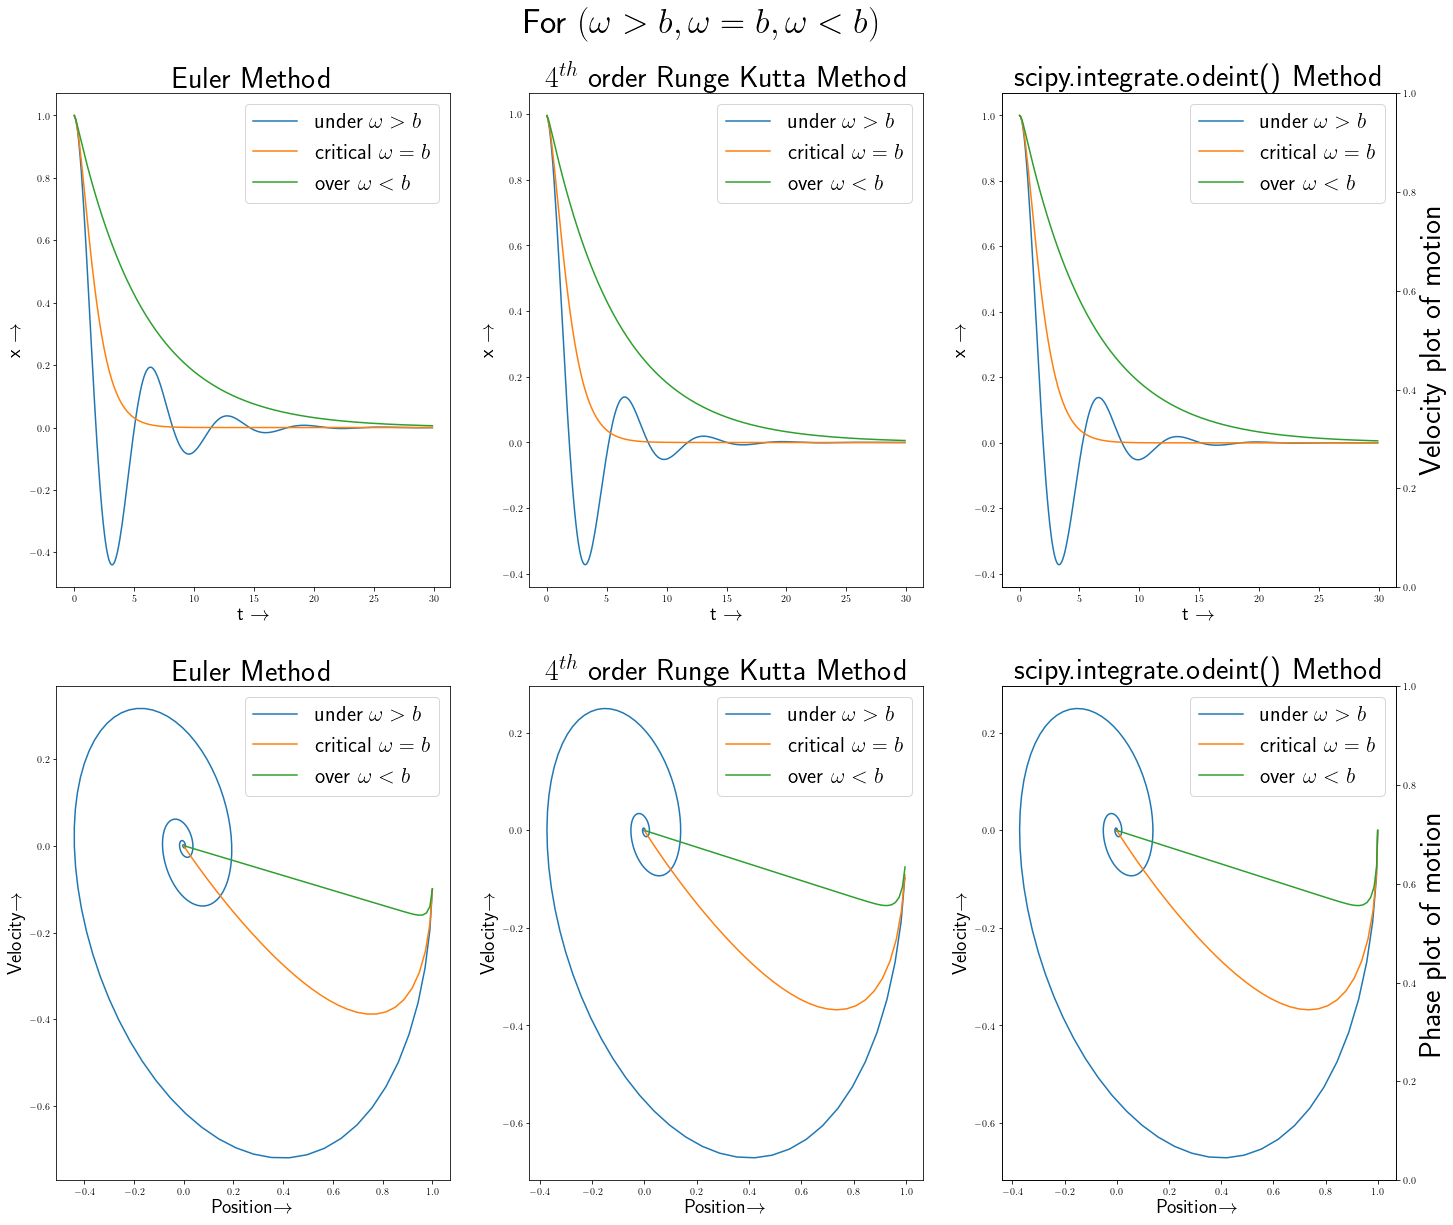

In [8]:
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (24,20)
plt.suptitle("For $(\omega>b,\omega=b,\omega<b)$",fontsize=35,y=0.94)
for w,b in zip(W,B):
    plt.subplot(231)
    plt.title('Euler Method',fontsize=30)
    plt.plot(t,Euler(f,X0,t,n,h)[0])
    plt.xlabel(r"t $\rightarrow$",size=20)
    plt.ylabel(r"x $\rightarrow$",size=20)
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    
    plt.subplot(232)
    plt.title( '$4^{th}$ order Runge Kutta Method',fontsize=30)
    plt.plot(t,RK4_method(f,X0,t,n,h)[0])
    plt.xlabel (r"t $\rightarrow$",size=20)
    plt.ylabel (r"x $\rightarrow$",size=20)
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    
    plt.subplot(233)
    plt.title( 'scipy.integrate.odeint() Method',fontsize=30)
    plt.plot(t,SIO_method(f,X0,t)[0])
    plt.xlabel (r"t $\rightarrow$",size=20)
    plt.ylabel (r"x $\rightarrow$",size=20)
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.twinx()
    plt.ylabel('Velocity plot of motion',fontsize=30)
    
    plt.subplot(234)
    plt.title('Euler Method',fontsize=30)
    plt.plot(Euler(f,X0,t,n,h)[0],Euler(f,X0,t,n,h)[1])
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.xlabel(r'Position$\rightarrow$',size=20)
    plt.ylabel(r'Velocity$\rightarrow$',size=20)
    
    plt.subplot(235)
    plt.title( '$4^{th}$ order Runge Kutta Method',fontsize=30)
    plt.plot(RK4_method(f,X0,t,n,h)[0],RK4_method(f,X0,t,n,h)[1])
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.xlabel(r'Position$\rightarrow$',size=20)
    plt.ylabel(r'Velocity$\rightarrow$',size=20)
    
    plt.subplot(236)
    plt.title( 'scipy.integrate.odeint() Method',fontsize=30)
    plt.plot(SIO_method(f,X0,t)[0],SIO_method(f,X0,t)[1])
    plt.legend([ "under $\omega>b$","critical $\omega=b$","over $\omega<b$"],fontsize=22)
    plt.xlabel(r'Position$\rightarrow$',size=20)
    plt.ylabel(r'Velocity$\rightarrow$',size=20)
    plt.twinx()
    plt.ylabel('Phase plot of motion',fontsize=30)
plt.show()

# $$ \text{ASSIGNMENT 3} $$
Q1. Numerically solve the equation of **a underdamped periodically forced oscillator**.
$$\displaystyle{ m\frac{d^{2}x}{dt^{2}}+2mb\frac{dx}{dt}+m\omega^{2}x=A\cos(\varOmega t) }$$

$$\displaystyle{=>\frac{d^{2}x}{dt^{2}}=-2b\frac{dx}{dt}-\omega^{2}x+\frac{A}{m}\cos(\varOmega t)}$$

$\text{Take } m=1,b=0.3,\omega=1,\varOmega=2,A=3 \text{ at }t=0,x=1,v=0 $ 

 Plot the $x-t$ and $x-v$ curve. Comment about your observation.

In [2]:
def f(X,t,w=1,b=0.3,W=2,A=3,m=1):
    x,v=X[0],X[1]
    dxdt=v
    dvdt= -2*b*v - w**2*x + (A/m)*np.cos(W*t)
    return np.array([dxdt,dvdt])

x,v=1,0
X0 = [x,v]

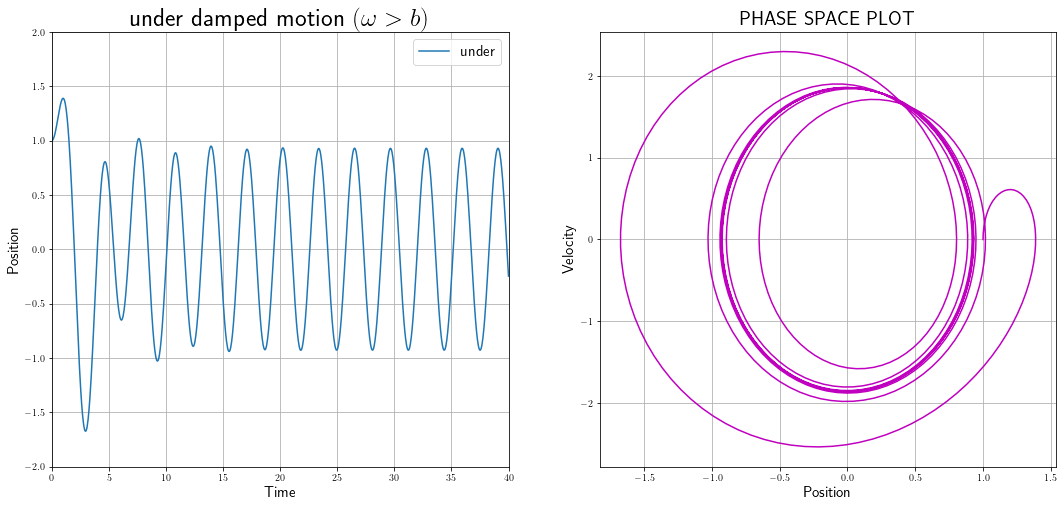

In [3]:
t = np.linspace (0,40,1000)
s = SI.odeint(f,X0,t)
x,v = s[:,0],s[:,1]
plt.subplot(121)
plt.plot(t,x)
plt.axis([0,40,-2,+2])
plt.grid()
plt.title(r"under damped motion $(\omega>b)$",fontsize=25)
plt.xlabel ("Time",size=15);plt.ylabel ("Position",size=15)
plt.legend(["under "],fontsize=15)
plt.subplot(122) 
plt.plot(x,v,'m')
plt.grid()
plt.title("PHASE SPACE PLOT",size=20)
plt.xlabel ("Position",size=15)
plt.ylabel ("Velocity",size=15)
plt.show()

#### Comment : 
     We know that the phase space plot does not cut but here it cuts. 
     Its mean that there must be any hidden variable which we have to take into account. 
     In this case, time is the hidden variable . 
     If we are to take it into account, then there will be no cuts in the x-v plot.

Q2.a) Modify the above equation to estimate **the amplitude of the steady oscillation**.

$ \quad \ $b) Modify prof 2(a) to simulate both **amplitude and velocity resonance**

The amplitude of steady state oscillation:  0.9284693772111109


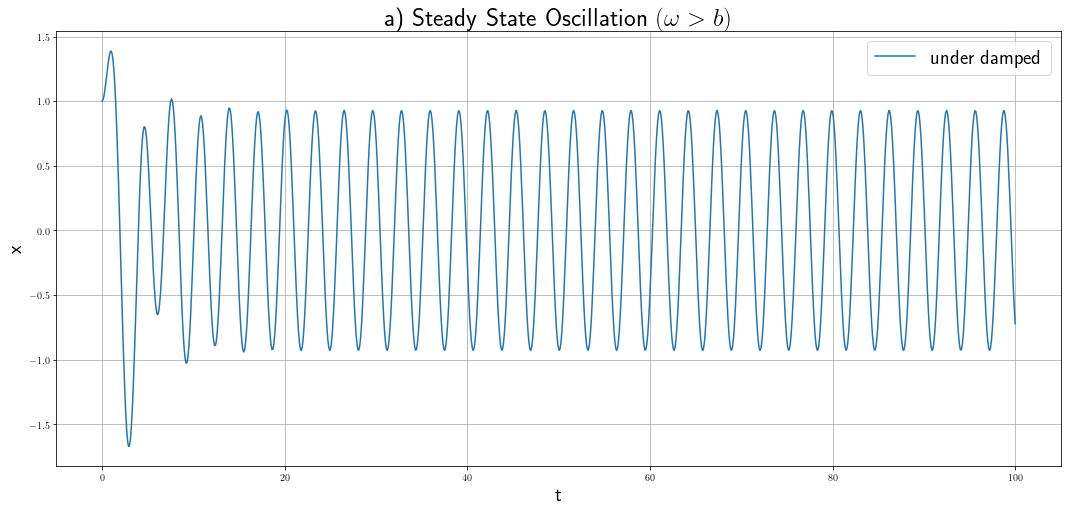

In [4]:
t= np.linspace (0,100,1000)  
s = SI.odeint(f,X0,t)
x,v = s[:,0],s[:,1]
print('The amplitude of steady state oscillation: ',max(x[500:]))

plt.plot(t,x)
plt.grid()
plt.title(r"a) Steady State Oscillation $(\omega>b)$",size=25)
plt.xlabel ("t",size=20)
plt.ylabel ("x",size=20)
plt.legend(["under damped"],fontsize=20)
plt.show()

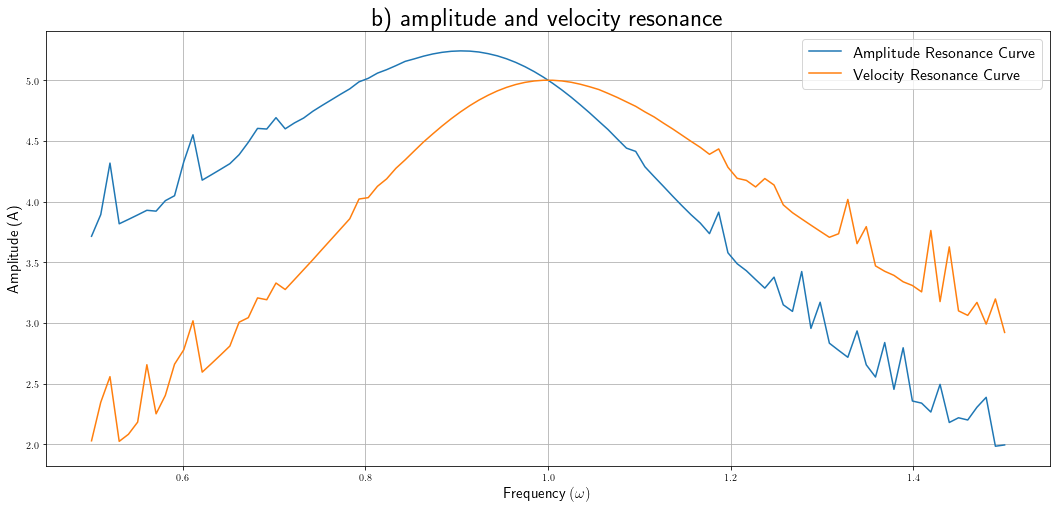

In [5]:
W = np.linspace(0.5, 1.5, 100)
V,X = [],[]
for w in W:
    def f(X,t,w0=1,b=0.3,A=3,m=1,W=w):
        x,v=X[0],X[1]
        dxdt=v
        dvdt= -2*b*v - w0**2*x + (A/m)*np.cos(W*t)
        return np.array([dxdt,dvdt])
    X0 = [1, 0]
    t = np.linspace(2000, 4000, 1000)
    s = SI.odeint(f, X0, t)
    X.append(max(s[:, 0]))
    V.append(max(s[:, 1]))
plt.plot(W,X,label='Amplitude Resonance Curve')
plt.plot(W,V,label='Velocity Resonance Curve')
plt.xlabel(r'Frequency $(\omega)$',size=15)
plt.ylabel('Amplitude of velocity V_{0}',size=15)
plt.grid()
plt.title(r"b) amplitude and velocity resonance",size=25)
plt.ylabel('Amplitude (A)',size=15)
plt.legend(fontsize=16)
plt.show()

3) Solve **a nonlinear harmonic oscillator** and plot the time series and phase plot
$$ m\frac{d^{2}x}{dt^{2}}+m \omega^{2}x^{p}=0 \qquad \text{  for p=3,5,7,9 }$$

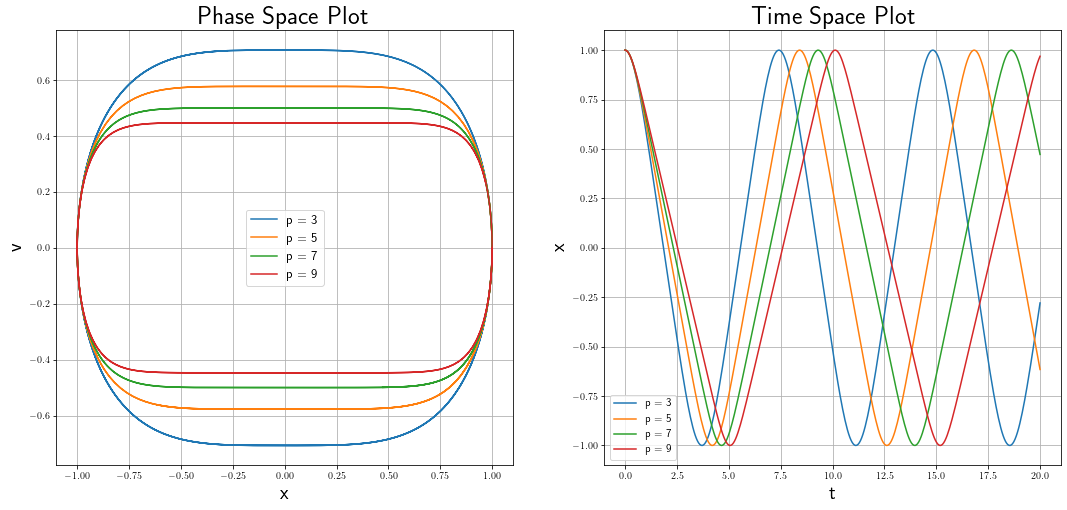

In [6]:
v0,j,w,x0 = 0,0,1,1
p = np.array([3,5,7,9])
X,V = [],[]

for i in p:
    def f(X,t): 
        x,v=X
        dx=v
        dv=-w**2*x**i
        return dx,dv
    T=np.linspace(0,20,350)
    X0=[1,0]
    s=SI.odeint(f,X0,T)
    X.append(s[:,0])
    V.append(s[:,1])       
plt.subplot(121)
plt.title("Phase Space Plot",size=25)   
plt.plot(X[0],V[0], X[1],V[1], X[2],V[2], X[3],V[3])
plt.legend(['p = 3','p = 5','p = 7','p = 9'],fontsize=13)
plt.xlabel ("x",size=20)
plt.ylabel ("v",size=20)
plt.grid()
plt.subplot(122)
plt.title("Time Space Plot",size=25)
plt.plot(T,X[0], T,X[1], T,X[2], T,X[3])
plt.legend(['p = 3','p = 5','p = 7','p = 9'],fontsize=11)
plt.xlabel ("t",size=20)
plt.ylabel ("x",size=20)
plt.grid()
plt.show()

# $$ \text{ASSIGNMENT 4} $$
Q1. Solve **a linear oscillator** and write the code to estimate **the frequency of oscillation**. Verify your program for three values of $\omega$.

The frequency of oscillation is 1.0001250781738587


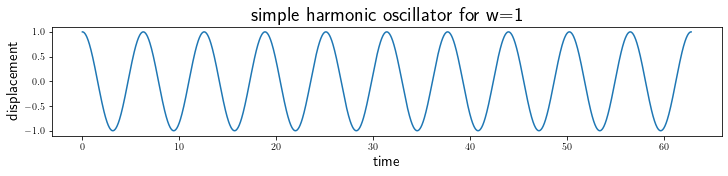

The frequency of oscillation is 2.0001111728738192


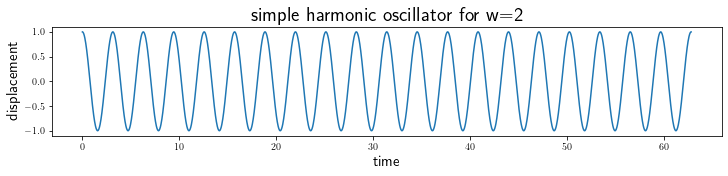

The frequency of oscillation is 3.00117962466488


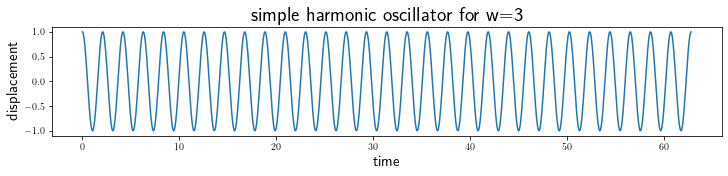

In [2]:
def F(X,t):
    x,v=X
    dx=v
    dv=-w**2*x
    return np.array([dx,dv])

W=[1,2,3]
plt.rcParams["figure.figsize"] = (12,2)
for w in W:
    N=2000
    T=np.linspace(0,20*np.pi,N)
    X0=[1,0]
    Xs=odeint(F,X0,T)
    Xt=Xs[:,0]
    T1=[]
    for i in range(1,N-1):
        if Xt[i-1]<Xt[i]>Xt[i+1]:
                T1.append(T[i])   
    AvTP=np.average(np.diff(T1))
    f=2*np.pi/AvTP
    print('The frequency of oscillation is', f)
    plt.plot(T,Xt)
    plt.xlabel('time',fontsize=15)
    plt.ylabel('displacement',fontsize=15)
    plt.title('simple harmonic oscillator for w='+str(w),fontsize=20)
    plt.show()

2. use your above code to simulate **the frequency-amplitude diagram of a nonlinear oscillator**
$$\large m\frac{d^{2}x}{dt^{2}}+m\omega^{2}x^{p}=0 \text{ for p=1,3,7,9}$$ 

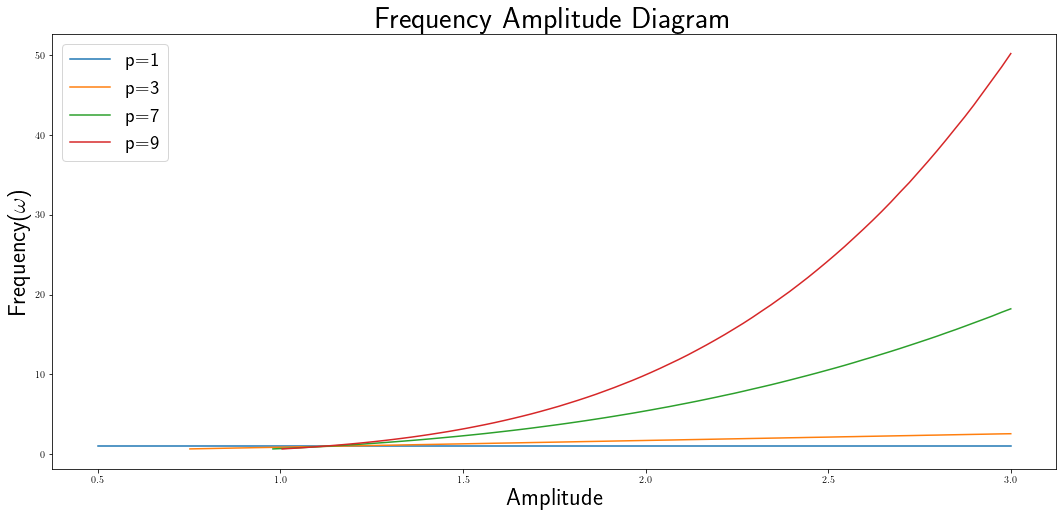

In [3]:
def f(X,t,k):
    x,v=X
    dx=v
    dv=-w**2*x**k
    return [dx,dv]
plt.rcParams["figure.figsize"] = (18,8)
p=[1,3,7,9]
w=1
H=1000
T=np.linspace(0,20,H)
A=np.linspace(0.5,3,100)

for i in p:
    W=[]
    for j in A:
        X0=[j,0]
        s=SI.odeint(f,X0,T,args=(i,))
        x=s[:,0]
        T1=[]
        for h in range(1,H-1):
            if x[h-1]<x[h]>x[h+1]:
                T1.append(T[h])
        Tp=np.mean(np.diff(T1))
        W.append(2*np.pi/Tp)
    plt.plot(A,W)
plt.title("Frequency Amplitude Diagram",size=30)
plt.ylabel("Frequency($\omega$)",size=24)
plt.xlabel("Amplitude",size=24)
plt.legend(['p=1','p=3','p=7','p=9'],fontsize=20)
plt.show()

### Comment :  
                   with the increase in non-linearty we are getting a more frequency dependent amplitude.

Q3. Study **a full amplitude pendulum**

$$\large m\frac{d^{2}x}{dt^{2}}+2mb\frac{dx}{dt}+m\omega^{2}\sin(x)=A\cos(\varOmega t)$$

$$\large => \frac{d^{2}x}{dt^{2}}+2b\frac{dx}{dt}+\omega^{2}\sin(x)=\frac{A}{m}\cos(\varOmega t)$$

$$\large => \frac{d^{2}x}{dt^{2}} = \frac{A}{m}\cos(\varOmega t)-2b\frac{dx}{dt}-\omega^{2}\sin(x)$$

   Take $m=1,b=0.25,A=\frac{2}{3},\omega=1,\varOmega=\frac{2}{3}$ 

   a) plot $x-t$ in both the cases and plot $x-v$ in both the cases
   
   b) and there after vary $A=[1.0,1.2]$ same as of (a) 
   
   c) use initial condition as (1,0) and (1.0001,0). 
   
$\qquad$Let the solutions of x in this two cases of initial conditions be $x_{1}$ and $x_{2}$.  $ \\ $

$\qquad$Let $\Delta x=|x_{1}-x_{2}|$.  $ \\ $

$\qquad$Plot $\Delta x-t$ curve for $ A=[1.0,1.2]$.
   
   d) Put comments on your observations in (a)-(c).
### Case i : For $ A=\frac{2}{3}$

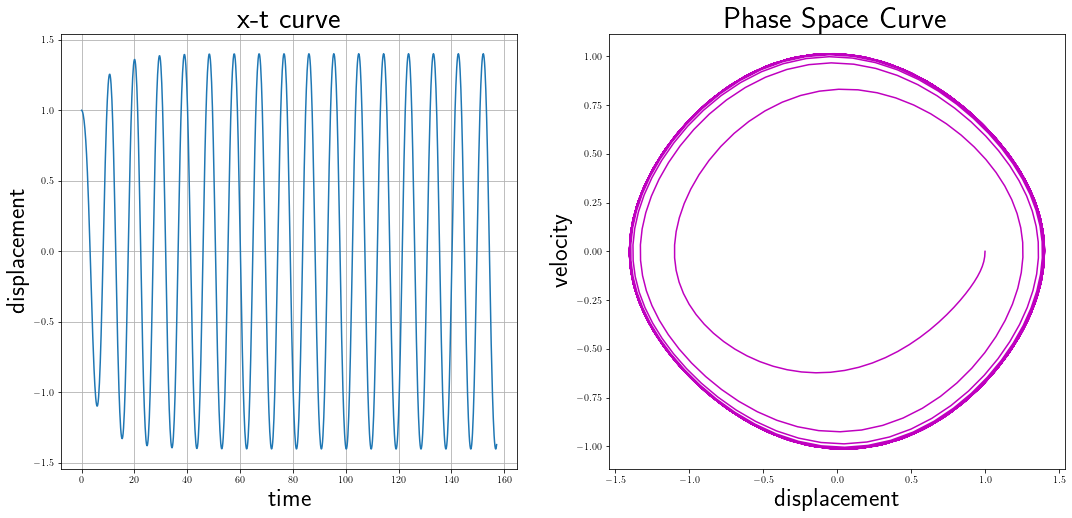

In [4]:
def F(X,t):
    x,v = X
    dx = v
    dv = -w**2*np.sin(x) - 2*b*v + A*np.cos(W*t)
    return np.array([dx,dv])

b,w,W,A = 0.25,1,(2/3),(2/3)    
T = np.linspace(0,50*np.pi/w,1000)
X0 = [1,0]
Xs1 = odeint(F,X0,T)
Xt,Vt = Xs1[:,0],Xs1[:,1]

plt.subplot(121)
plt.plot(T,Xt)
plt.grid()
plt.xlabel('time', size=25)
plt.ylabel('displacement', size=25)
plt.title('x-t curve ', size=30)

plt.subplot(122)
plt.plot(Xt,Vt,'m')
plt.ylabel('velocity', size=25)
plt.xlabel('displacement', size=25)
plt.title('Phase Space Curve', size=30)
plt.show()

### Case ii : For A=[1.0,1.2]

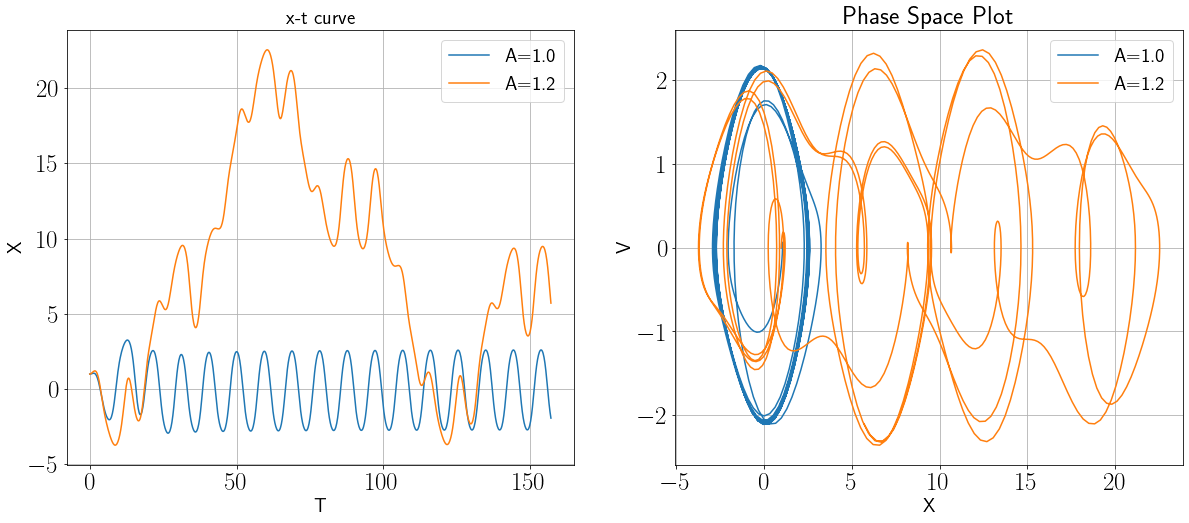

In [160]:
b,w,W=0.25,1,(2/3)
T=np.linspace(0,50*np.pi/w,1000)
a=[1,1.2]
X,V=[],[]

    
for i in a:   
    def F(X,t):
        x,v=X
        dx=v
        dv=-w**2*np.sin(x) -2*b*v +i*np.cos(W*t)
        return np.array([dx,dv])
    X0=[1,0]
    Xs1=SI.odeint(F,X0,T)
    X.append(Xs1[:,0])
    V.append(Xs1[:,1])
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,8))    
ax2.plot(X[0],V[0],X[1],V[1])
ax2.legend(['A=1.0','A=1.2'],fontsize=20)
ax2.set_title("Phase Space Plot",size=25)
ax2.set_xlabel ("X",size=20)
ax2.set_ylabel ("V",size=20)
ax2.grid()
ax1.plot(T,X[0],T,X[1])
ax1.legend(['A=1.0','A=1.2'],fontsize=20)
ax1.set_title('x-t curve ',size=20)
ax1.set_xlabel ("T",size=20)
ax1.set_ylabel ("X",size=20)
ax1.grid()
plt.show()

<Figure size 1296x576 with 0 Axes>

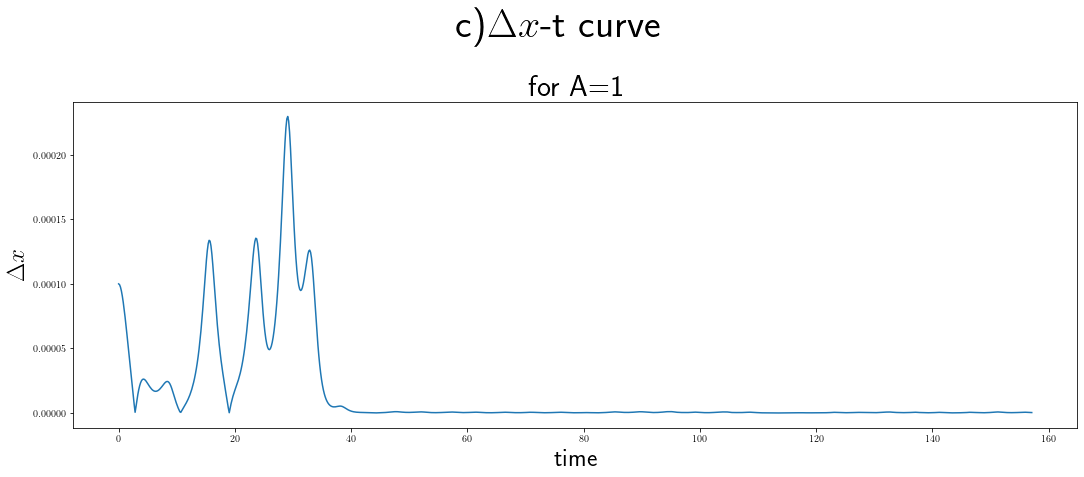

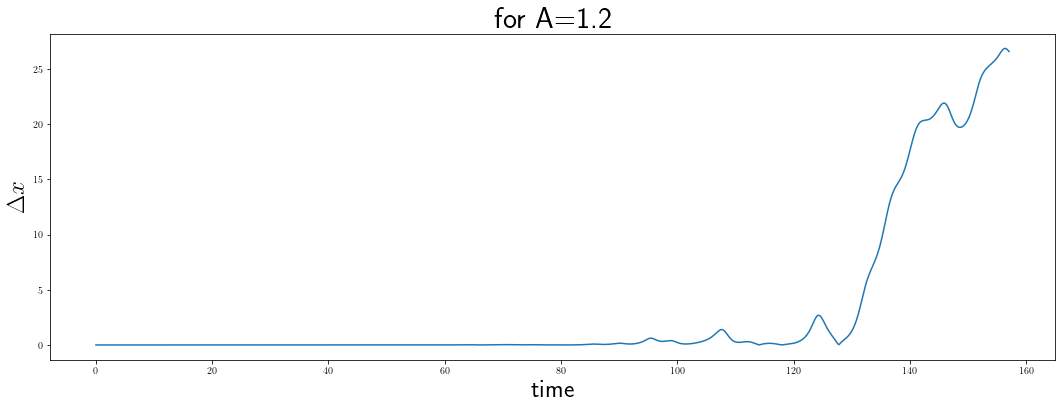

In [6]:
b,w,W=0.25,1,(2/3)
T=np.linspace(0,50*np.pi/w,1000)
a=[1,1.2]

for i in a:    
    def F(X,t):
        x,v=X
        dx=v
        dv=-w**2*np.sin(x) -2*b*v +i*np.cos(W*t)
        return np.array([dx,dv])  
    
    X0=[1.0001,0]
    Xs2=odeint(F,X0,T)
    Xt2,Vt2=Xs2[:,0],Xs2[:,1]
    X_0=[1,0]
    Xs1=odeint(F,X_0,T)
    Xt1,Vt1=Xs1[:,0],Xs1[:,1]
    delx=np.abs(Xt1-Xt2)
    plt.suptitle('c)$\Delta x$-t curve',y=1.1,size=40)
    plt.subplots(figsize=(18,6))
    plt.plot(T,delx)
    plt.ylabel('$\Delta x$',size=25)
    plt.xlabel('time',size=25)
    plt.title(' for A='+str(i),size=30)
plt.show()

#### Comment : 
    In nonlinear oscillator the phase-space plot shifts from ellipse and also we get frequancy dependent amplitude.